In [1]:
#1. Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# 2. Read the data file and show the data
df = pd.read_csv('/Users/mac/Documents/HK6/IS403.PTDL KD/đồ án main/code/Data_stock_SCS_new.csv')
df

,time,open,high,low,close,volume
0,2019-03-01,59960,59960,59920,59960,34010
1,2019-03-04,59960,60080,58980,59960,8580
2,2019-03-05,58720,60010,58720,59960,35720
3,2019-03-06,59960,60130,59960,59960,9290
4,2019-03-07,59960,60400,59960,60330,19290
...,...,...,...,...,...,...
1310,2024-05-27,90900,90900,88900,90000,59200
1311,2024-05-28,89500,91000,89300,90000,109100
1312,2024-05-29,90100,91500,90000,90300,121100
1313,2024-05-30,90300,90300,88500,89700,82600


In [3]:
# 3. Divide the train:test at a ratio of 7:3
df = df[['close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing
train_size = int(0.7 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [4]:
# 4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [5]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(x_test)  

In [6]:
# 6. The process of creating index predict the next 30, 60, 90 days
last_index = df.index[-1]

# Create arrays of consecutive integers starting from last_index for 30, 60, and 90 days
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

# Predict the closing prices for the next 30, 60, and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 30, 60, 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)


Predicted closing prices for the next 30 days:
[79353.19435982 79372.08016753 79390.96597523 79409.85178293
 79428.73759064 79447.62339834 79466.50920604 79485.39501375
 79504.28082145 79523.16662915 79542.05243686 79560.93824456
 79579.82405226 79598.70985997 79617.59566767 79636.48147537
 79655.36728308 79674.25309078 79693.13889848 79712.02470619
 79730.91051389 79749.79632159 79768.6821293  79787.567937
 79806.4537447  79825.33955241 79844.22536011 79863.11116781
 79881.99697552 79900.88278322]
Predicted closing prices for the next 60 days:
[79353.19435982 79372.08016753 79390.96597523 79409.85178293
 79428.73759064 79447.62339834 79466.50920604 79485.39501375
 79504.28082145 79523.16662915 79542.05243686 79560.93824456
 79579.82405226 79598.70985997 79617.59566767 79636.48147537
 79655.36728308 79674.25309078 79693.13889848 79712.02470619
 79730.91051389 79749.79632159 79768.6821293  79787.567937
 79806.4537447  79825.33955241 79844.22536011 79863.11116781
 79881.99697552 79900.88

In [7]:
# 7. Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import numpy as np

# Calculate RMSE 
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_test = mean_absolute_percentage_error(y_test, y_pred)

# Calculate MLSE 
msle_test = mean_squared_log_error(y_test, y_pred)


print("RMSE:", rmse_test)
print("MAPE:", mape_test, "%")
print("MSLE:", msle_test)

RMSE: 9905.853943979891
MAPE: 13.952305661561109 %
MSLE: 0.02007765948917356


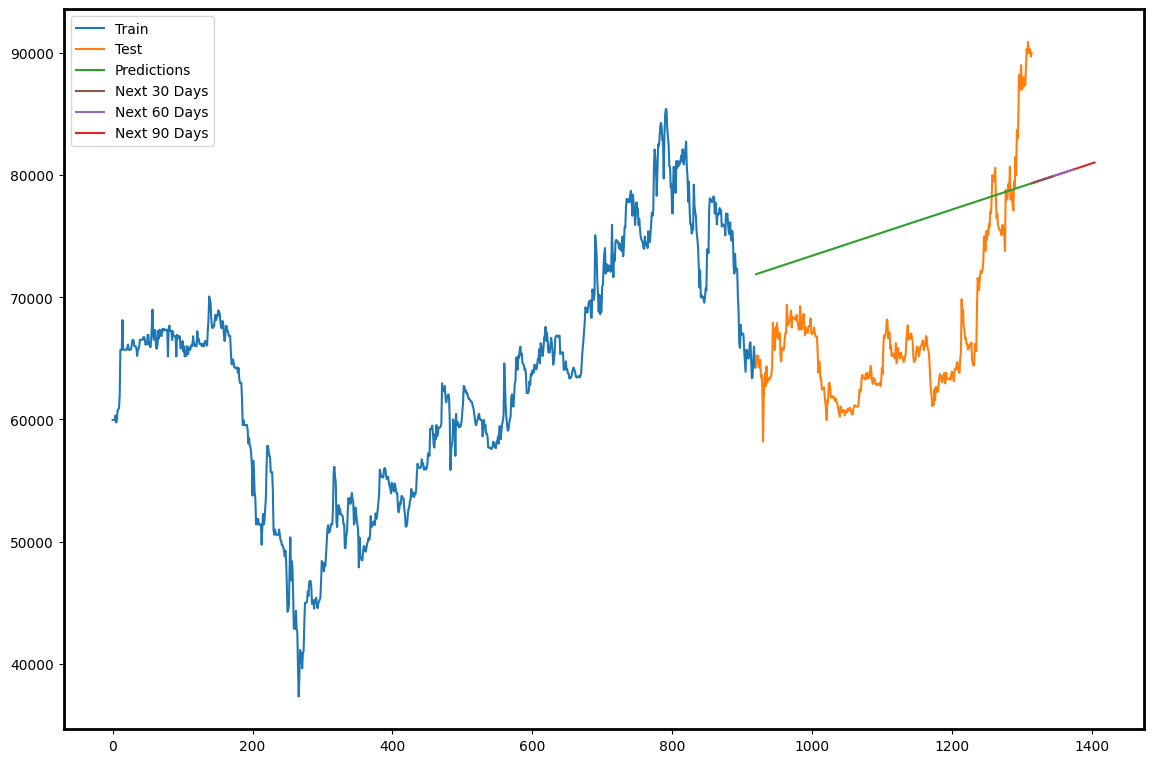

In [8]:
# 8.Plot the results
plt.figure(figsize=(12, 8))
line1, = plt.plot(train_data.index, train_data['close'], label='Train')
line2, = plt.plot(test_data.index, test_data['close'], label='Test')
line3, = plt.plot(test_data.index, y_pred, label='Predictions')
line4, = plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next 90 Days')
line5, = plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next 60 Days')
line6, = plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next 30 Days')
plt.legend(handles=[line1, line2, line3, line6, line5, line4])

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
    
plt.show()